# 如何使用Python擬合資料?

## 參考資料

* <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html" target="_blank">numpy.polyfit</a>
* <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html" target="_blank">scipy.optimize.curve_fit</a>, <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html" target="_blank">scipy.optimize.least_squares</a>
* <a href="http://docs.astropy.org/en/stable/modeling/index.html" target="_blank">astropy.modeling</a> 

## 準備工作：範例所需檔案下載及說明

* O-C_ephemeris.txt (已在files4examples資料夾中無須下載)：

  檔案說明(待補)


* pulse-profile.txt (已在files4examples資料夾中無須下載)：

  檔案說明(待補)


* QSOnumber.txt (已在files4examples資料夾中無須下載)：

  檔案說明(待補)
  

* 其他範例檔案(待補)


## 範例1：以NumPy的多項式曲線擬合O-C ephemeris

In [1]:
from astropy.io import ascii
import numpy as np
oc_ephemeris = ascii.read('../files4examples/O-C_ephemeris.txt', names=['cycles', 'delay', 'error'])
cycles = oc_ephemeris['cycles']
delay = oc_ephemeris['delay']
error = oc_ephemeris['error']

* <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html" target="_blank">polyfit</a>為NumPy中以多項式曲線來擬合資料的函式，回傳值為多項式的係數。 <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html" target="_blank">poly1d</a>為NumPy中用來產生多項式物件的類別。

In [2]:
p2 = np.poly1d(np.polyfit(cycles, delay, 2))
p3 = np.poly1d(np.polyfit(cycles, delay, 3))
x = np.linspace(-10000, 50000, 100)

<IPython.core.display.Javascript object>


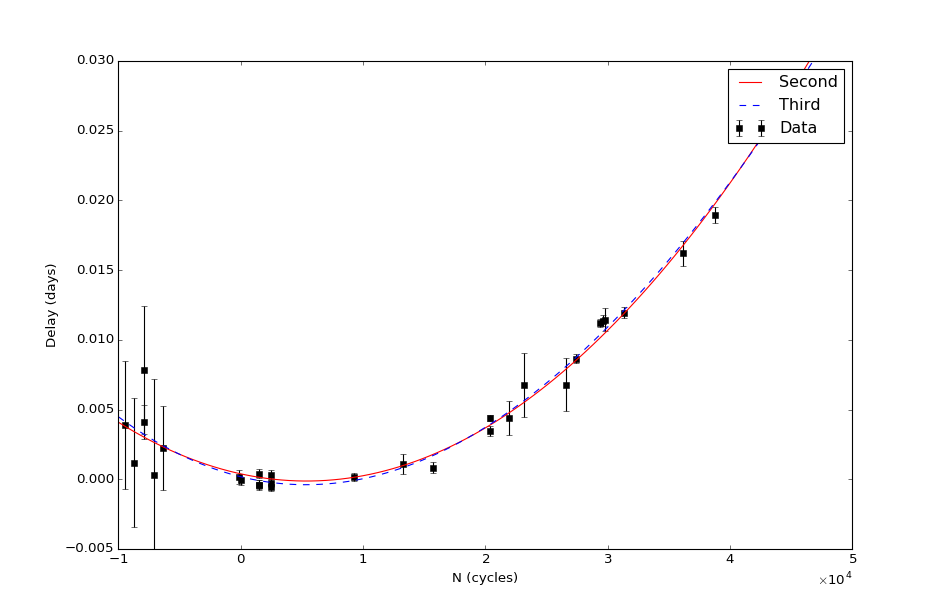

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
fig = plt.figure()
ax = fig.add_subplot(111)
plt.errorbar(cycles, delay, yerr=error, fmt='sk')
plt.hold(True)
plt.plot(x, p2(x), 'r-')
plt.plot(x, p3(x), '--')
plt.hold(False)
plt.ylim(-0.005, 0.03)
plt.legend(('Second', 'Third', 'Data'))
plt.xlabel('N (cycles)')
plt.ylabel('Delay (days)')
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.show()

## 範例2：

## 範例3：

## 範例4：以Astropy的一維高斯曲線擬合QSO數量分佈

In [4]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models as mo
from astropy.modeling import fitting as fit
data = ascii.read('../files4examples/QSOnumber.txt')
x = data['x']
y = data['y']

In [6]:
model_init = mo.Gaussian1D(amplitude=4220, mean=-0.25, stddev=0.1)
fitter = fit.LevMarLSQFitter()
fit_res = fitter(model_init, x, y)
print(fit_res.amplitude)
print(fit_res.mean)
print(fit_res.stddev)

Parameter('amplitude', value=4078.8970040617974)
Parameter('mean', value=-0.17176406050119747)
Parameter('stddev', value=0.045674628679433164)


<IPython.core.display.Javascript object>


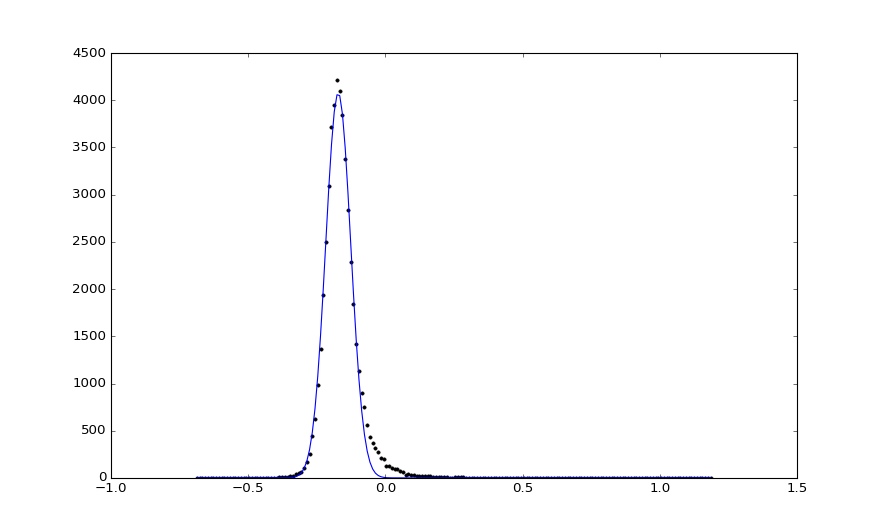

In [8]:
plt.figure()
plt.plot(x, y, '.k')
plt.hold(True)
plt.plot(x, fit_res(x))
plt.hold(False)
plt.show()